<a href="https://colab.research.google.com/github/beshoyArmia/Pneumonia-Detection-Using-VGG16/blob/main/pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import kagglehub
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam


In [ ]:
# Download dataset from Kaggle
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
print("Path to dataset files:", path)

# Define directories
train_dir = os.path.join(path, "chest_xray/train")
val_dir = os.path.join(path, "chest_xray/val")
test_dir = os.path.join(path, "chest_xray/test")

100%|██████████| 2.29G/2.29G [00:19<00:00, 129MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


In [ ]:
# Parameters
IMG_HEIGHT, IMG_WIDTH = 224, 224  # Input size for VGG16
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 2

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",

    #########################################################################################

)

val_test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
)

val_data = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
)

test_data = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False,
)

# Load VGG16 Pre-trained Model
vgg_base = VGG16(weights="imagenet", include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the base layers
# for layer in vgg_base.layers:
#     layer.trainable = False

# Add custom layers on top
x = Flatten()(vgg_base.output)
x = Dense(128, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)  # Dropout rate of 50%
x = Dense(NUM_CLASSES, activation="softmax")(x)

model = Model(inputs=vgg_base.input, outputs=x)
model.summary()
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)



######################################################################
# Unfreeze the top few layers of VGG16
# for layer in vgg_base.layers[-4:]:
#     layer.trainable = True

# Retrain
history_fine_tune = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS,
    verbose=1,
)
######################################################################

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_data, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")




Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 17,926,338 (68.38 MB)

 Trainable params: 17,926,338 (68.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 174s 809ms/step - accuracy: 0.7679 - loss: 0.5176 - val_accuracy: 0.8125 - val_loss: 0.4118
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 160s 766ms/step - accuracy: 0.8909 - loss: 0.2538 - val_accuracy: 0.8750 - val_loss: 0.4189
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 127s 752ms/step - accuracy: 0.9216 - loss: 0.1910 - val_accuracy: 0.8750 - val_loss: 0.3627
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 144s 764ms/step - accuracy: 0.9282 - loss: 0.1770 - val_accuracy: 0.7500 - val_loss: 0.5462
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 129s 762ms/step - accuracy: 0.9513 - loss: 0.1423 - val_accuracy: 0.6250 - val_loss: 1.0164
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 752ms/step - accuracy: 0.9535 - loss: 0.1322 - val_accuracy: 0.8125 - val_loss: 0.4519
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 129s 753ms/step - accuracy: 0.9525 - loss: 0.1167 - val_accuracy: 0.9375 - val_loss: 0.1528
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 128s 759ms/step - accuracy: 0.9613 - loss: 0.10

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step


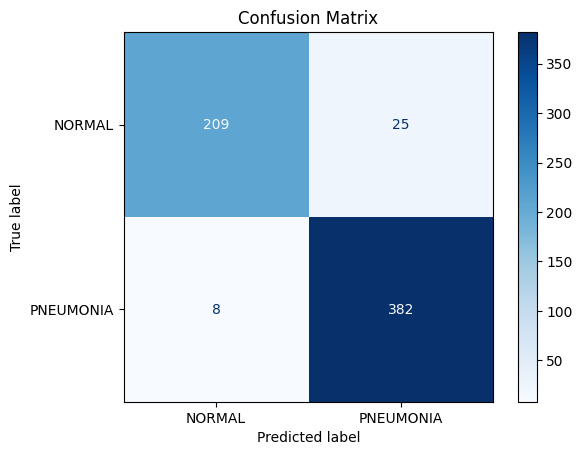

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.96      0.89      0.93       234
   PNEUMONIA       0.94      0.98      0.96       390

    accuracy                           0.95       624
   macro avg       0.95      0.94      0.94       624
weighted avg       0.95      0.95      0.95       624

Results Summary:
Test Accuracy: 94.71%
Precision: 0.9478
Recall: 0.9471
F1 Score: 0.9467


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict the classes for the test data
test_steps = test_data.samples // BATCH_SIZE + (test_data.samples % BATCH_SIZE > 0)
predictions = model.predict(test_data, steps=test_steps, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:")
print(report)

# Calculate Precision, Recall, F1 Score (Weighted averages for class imbalance)
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

# Extract Accuracy from Confusion Matrix
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)

# Print the summary of the results
print("Results Summary:")
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


In [ ]:
model_path=model.save('/content/my_model.h5')

Please upload an X-ray image to predict.


Saving person100_bacteria_481.jpeg to person100_bacteria_481.jpeg
Saving IM-0001-0001.jpeg to IM-0001-0001.jpeg


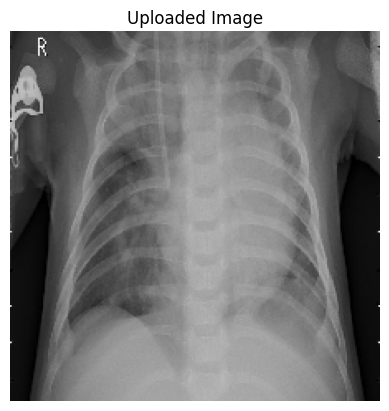

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step
The uploaded image is predicted to be: PNEUMONIA


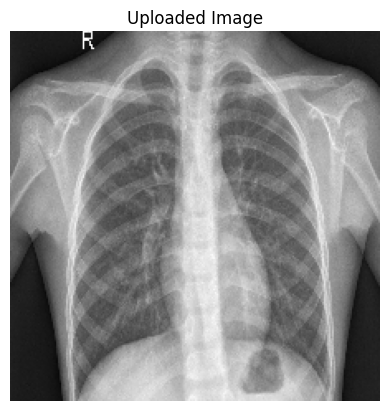

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
The uploaded image is predicted to be: NORMAL


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from google.colab import files
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the trained model
  # Update with the path to your trained model
model = load_model("/content/my_model.h5")

# Image preprocessing parameters
IMG_HEIGHT, IMG_WIDTH = 224, 224  # Match your model's input size

# Function to preprocess and predict
def preprocess_and_predict(image_path, model):
    """
    Preprocess the image and predict if it's NORMAL or PNEUMONIA.

    Args:
        image_path (str): Path to the image.
        model (keras.Model): Trained model for prediction.

    Returns:
        str: Prediction result - "NORMAL" or "PNEUMONIA".
    """
    # Load and preprocess the image
    img = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    plt.imshow(img)
    plt.title("Uploaded Image")
    plt.axis("off")
    plt.show()

    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions, axis=1)[0]  # Get the predicted class index
    class_names = ["NORMAL", "PNEUMONIA"]  # Update based on your dataset labels
    return class_names[class_idx]

# Upload an X-ray image
print("Please upload an X-ray image to predict.")
uploaded = files.upload()

# Predict the uploaded image
for filename in uploaded.keys():
    file_path = f"/content/{filename}"  # Path to the uploaded image
    prediction = preprocess_and_predict(file_path, model)
    print(f"The uploaded image is predicted to be: {prediction}")
